# Jonathan Halverson
# Tuesday, February 14, 2018
# Is the number of 311 calls per day in Boston seasonal?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

In [2]:
df = pd.read_csv('311.csv', parse_dates=['open_dt'], header=0, low_memory=False)

In [3]:
df.shape

(1191182, 29)

In [4]:
df.head(2).T

,0,1
CASE_ENQUIRY_ID,101002370927,101002370926
open_dt,2018-02-13 23:54:34,2018-02-13 23:41:00
target_dt,2018-02-15 08:30:00,2018-02-28 08:30:00
closed_dt,NaN,NaN
OnTime_Status,ONTIME,ONTIME
CASE_STATUS,Open,Open
CLOSURE_REASON,,
CASE_TITLE,Request for Pothole Repair,PRINTED : robert
SUBJECT,Public Works Department,Public Works Department
REASON,Highway Maintenance,Street Lights


In [5]:
df.tail(2).T

,1191180,1191181
CASE_ENQUIRY_ID,101000295614,101000295613
open_dt,2011-07-01 02:18:31,2011-07-01 01:32:33
target_dt,2011-07-05 02:18:31,2011-07-15 01:32:32
closed_dt,2011-07-01 06:12:43,2011-07-01 05:06:58
OnTime_Status,ONTIME,ONTIME
CASE_STATUS,Closed,Closed
CLOSURE_REASON,Case Closed Case Scheduled Items have been sch...,Case Closed Case Resolved replaced 100 amp fus...
CASE_TITLE,Schedule a Bulk Item Pickup,Street Light Outages
SUBJECT,Public Works Department,Public Works Department
REASON,Sanitation,Street Lights


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191182 entries, 0 to 1191181
Data columns (total 29 columns):
CASE_ENQUIRY_ID                   1191182 non-null int64
open_dt                           1191182 non-null datetime64[ns]
target_dt                         958003 non-null object
closed_dt                         1099109 non-null object
OnTime_Status                     1190509 non-null object
CASE_STATUS                       1191182 non-null object
CLOSURE_REASON                    1191182 non-null object
CASE_TITLE                        1190697 non-null object
SUBJECT                           1191182 non-null object
REASON                            1191182 non-null object
TYPE                              1191182 non-null object
QUEUE                             1191182 non-null object
Department                        1191182 non-null object
SubmittedPhoto                    243770 non-null object
ClosedPhoto                       141659 non-null object
Location     

In [7]:
df = df[['open_dt', 'Longitude', 'Latitude']]
df.head()

,open_dt,Longitude,Latitude
0,2018-02-13 23:54:34,-71.0587,42.3594
1,2018-02-13 23:41:00,-71.1234,42.2599
2,2018-02-13 23:26:28,-71.1126,42.3171
3,2018-02-13 23:26:10,-71.0810,42.3242
4,2018-02-13 23:21:33,-71.0587,42.3594


In [8]:
df['by_day'] = df.open_dt.map(lambda u: (u.year, u.month, u.day))
df['date'] = df.open_dt.dt.date
df['weekofyear'] = df.open_dt.dt.weekofyear
df['dayofweek'] = df.open_dt.dt.dayofweek
df['weekday_name'] = df.open_dt.dt.weekday_name
df['month'] = df.open_dt.dt.month
df['days_since'] = (df.open_dt.dt.date - df.iloc[-1, 0].date()) / np.timedelta64(1, 'D')

In [9]:
df.head()

,open_dt,Longitude,Latitude,by_day,date,weekofyear,dayofweek,weekday_name,month,days_since
0,2018-02-13 23:54:34,-71.0587,42.3594,"(2018, 2, 13)",2018-02-13,7,1,Tuesday,2,2419.0
1,2018-02-13 23:41:00,-71.1234,42.2599,"(2018, 2, 13)",2018-02-13,7,1,Tuesday,2,2419.0
2,2018-02-13 23:26:28,-71.1126,42.3171,"(2018, 2, 13)",2018-02-13,7,1,Tuesday,2,2419.0
3,2018-02-13 23:26:10,-71.0810,42.3242,"(2018, 2, 13)",2018-02-13,7,1,Tuesday,2,2419.0
4,2018-02-13 23:21:33,-71.0587,42.3594,"(2018, 2, 13)",2018-02-13,7,1,Tuesday,2,2419.0


In [10]:
weekend_days = df[df.dayofweek > 4].reset_index(drop=True)
week_days = df[df.dayofweek < 5].reset_index(drop=True)

In [11]:
weekend_days.head()

,open_dt,Longitude,Latitude,by_day,date,weekofyear,dayofweek,weekday_name,month,days_since
0,2018-02-11 23:47:27,-71.1022,42.3090,"(2018, 2, 11)",2018-02-11,6,6,Sunday,2,2417.0
1,2018-02-11 23:45:00,-71.1677,42.3487,"(2018, 2, 11)",2018-02-11,6,6,Sunday,2,2417.0
2,2018-02-11 23:18:43,-71.1178,42.2859,"(2018, 2, 11)",2018-02-11,6,6,Sunday,2,2417.0
3,2018-02-11 23:11:00,-71.0893,42.3499,"(2018, 2, 11)",2018-02-11,6,6,Sunday,2,2417.0
4,2018-02-11 23:07:00,-71.0587,42.3594,"(2018, 2, 11)",2018-02-11,6,6,Sunday,2,2417.0


### Recall dates and timestamps

In [12]:
df.loc[0, 'open_dt'].date()

datetime.date(2018, 2, 13)

In [13]:
pd.to_datetime('today')

Timestamp('2018-02-16 00:00:00')

In [14]:
df.loc[0, 'open_dt']

Timestamp('2018-02-13 23:54:34')

In [15]:
np.datetime64('2005-01-01')

numpy.datetime64('2005-01-01')

In [16]:
np.datetime64(df.iloc[-1, 0])

numpy.datetime64('2011-07-01T01:32:33.000000')

In [17]:
df.iloc[-1, 0].date()

datetime.date(2011, 7, 1)

In [18]:
df.open_dt.index[-1]

1191181

In [19]:
df.open_dt.tail(1)

1191181   2011-07-01 01:32:33
Name: open_dt, dtype: datetime64[ns]

In [20]:
df.open_dt.iloc[-1]

Timestamp('2011-07-01 01:32:33')

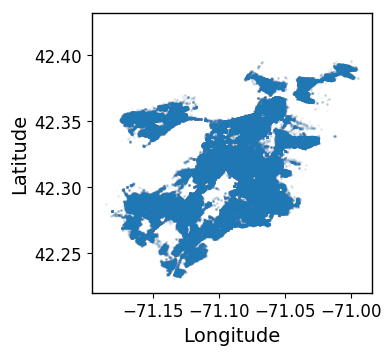

In [21]:
plt.scatter(df.Longitude, df.Latitude, s=1, alpha=0.01)
plt.axis('equal')
plt.axis('square')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [22]:
counts = df.date.value_counts().sort_index().reset_index()
counts.columns = ['date', 'counts']
counts.head()

,date,counts
0,2011-07-01,378
1,2011-07-02,84
2,2011-07-03,49
3,2011-07-04,107
4,2011-07-05,406


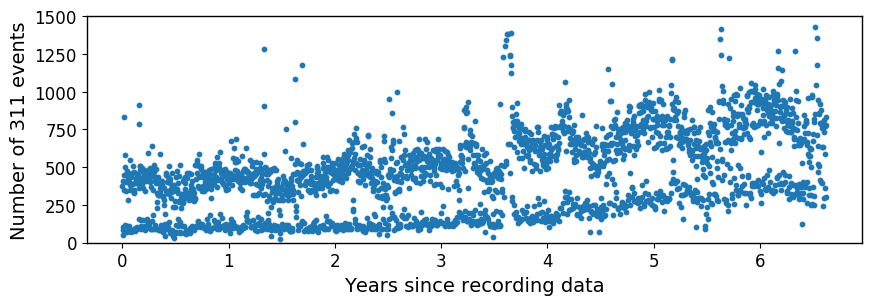

In [23]:
plt.subplots(1, 1, figsize=(10, 3))
plt.scatter(counts.index/365.0, counts.counts, s=10, alpha=1)
plt.ylim(0, 1500)
plt.xlabel('Years since recording data')
plt.ylabel('Number of 311 events')

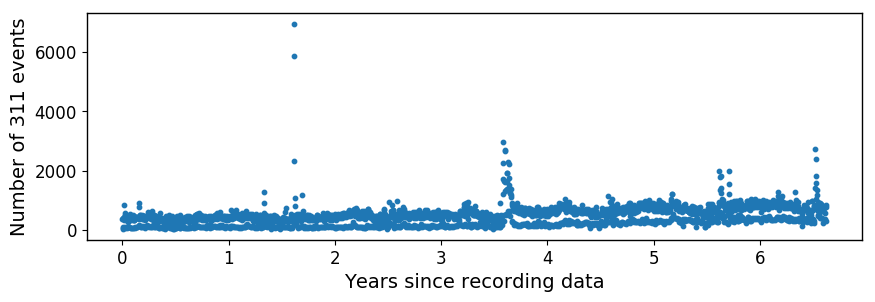

In [24]:
plt.subplots(1, 1, figsize=(10, 3))
plt.scatter(counts.index/365.0, counts.counts, s=10, alpha=1)
plt.xlabel('Years since recording data')
plt.ylabel('Number of 311 events')

In [25]:
weekend_counts = weekend_days.date.value_counts()
weekend_counts = weekend_counts[weekend_counts < 2000]

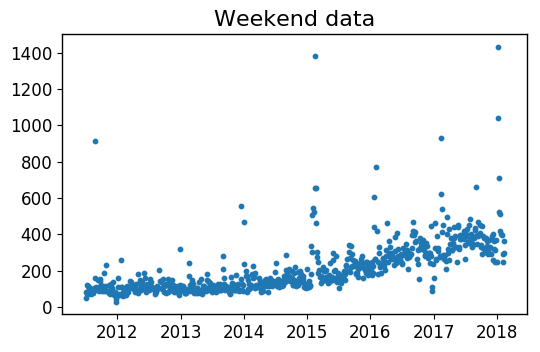

In [26]:
plt.scatter(weekend_counts.index, weekend_counts.values, s=10)
plt.title('Weekend data')
#plt.xlim(pd.to_datetime('2012-01-01'), pd.to_datetime('2013-01-01'))

In [27]:
df.by_day.value_counts().sort_index(ascending=True).head(10)

(2011, 7, 1)     378
(2011, 7, 2)      84
(2011, 7, 3)      49
(2011, 7, 4)     107
(2011, 7, 5)     406
(2011, 7, 6)     834
(2011, 7, 7)     447
(2011, 7, 8)     351
(2011, 7, 9)     120
(2011, 7, 10)     74
Name: by_day, dtype: int64

In [28]:
week_counts = df.weekofyear.value_counts().sort_index()
week_counts.head()

1    24447
2    26950
3    22970
4    21596
5    29728
Name: weekofyear, dtype: int64

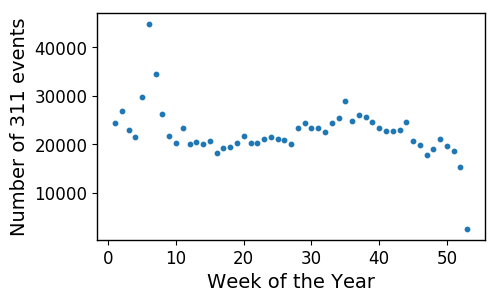

In [29]:
plt.subplots(1, 1, figsize=(5, 3))
plt.scatter(week_counts.index, week_counts.values, s=10, alpha=1)
plt.xlabel('Week of the Year')
plt.ylabel('Number of 311 events')

In [30]:
pd.to_datetime('2018-01-01').weekofyear

1

In [31]:
pd.to_datetime('2018-08-01').weekofyear

31

In [32]:
dow = df.dayofweek.value_counts().sort_index()
dow

0    206911
1    220179
2    214311
3    201695
4    189427
5     81718
6     76941
Name: dayofweek, dtype: int64

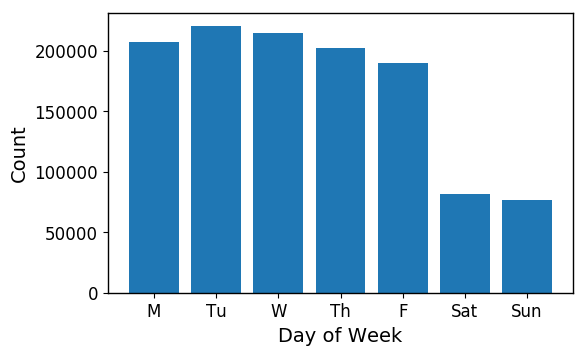

In [33]:
plt.bar(dow.index, dow.values, tick_label=['M', 'Tu', 'W', 'Th', 'F', 'Sat', 'Sun'])
plt.xlabel('Day of Week')
plt.ylabel('Count')

# FFT on day data

In [34]:
bos_wthr = pd.read_csv('../project_boston_restaurants/data/boston_weather_2015_2011.csv', parse_dates=['EST'])
data = bos_wthr['Mean TemperatureF'] # use this as a check

In [35]:
data = df.date.value_counts().sort_index()
#data = week_days.date.value_counts().sort_index()
data = data[data < 2000]
data.head(10)

2011-07-01    378
2011-07-02     84
2011-07-03     49
2011-07-04    107
2011-07-05    406
2011-07-06    834
2011-07-07    447
2011-07-08    351
2011-07-09    120
2011-07-10     74
Name: date, dtype: int64

In [36]:
N = data.size
freq = np.fft.fftfreq(n=N, d=1.0)
Hn = np.fft.fft(data.values)
Xn = Hn / N

In [37]:
ind = np.argwhere(freq > 0.0).flatten()

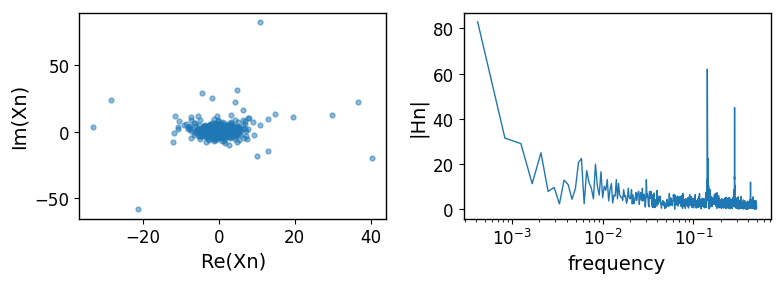

In [38]:
plt.subplots(figsize=(8, 3))
plt.subplot(121)
plt.scatter(Xn[ind].real, Xn[ind].imag, marker='.', alpha=0.5)
plt.xlabel('Re(Xn)')
plt.ylabel('Im(Xn)')
plt.subplot(122)
plt.semilogx(freq[ind], np.absolute(Xn[ind]))
plt.xlabel('frequency')
plt.ylabel('|Hn|')
plt.tight_layout()

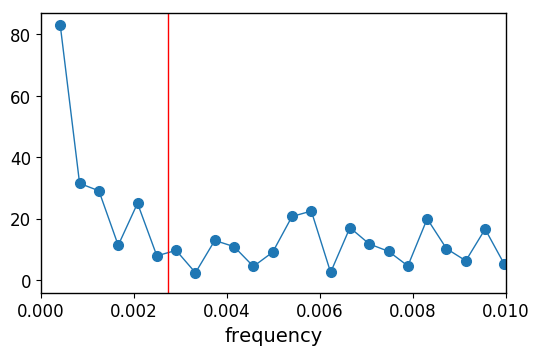

In [39]:
plt.plot(freq[ind], np.absolute(Xn[ind]), marker='o')
plt.axvline(1.0 / 365.0, c='r')
plt.xlim(0.0, 0.01)
plt.xlabel('frequency')
#plt.title('Weekday data')

We do not see a seasonality effect. Note that when only weekdays are considered the frequency should be around 261 days.

### Do the number of 311 events follow a Poisson distribution?

Do the number of events per weekday follow a Poisson distribution. The assemptions would seem to suggest that it should.

In [40]:
counts = week_days.groupby('date').size().values
counts

array([378, 107, 406, ..., 771, 830, 778])

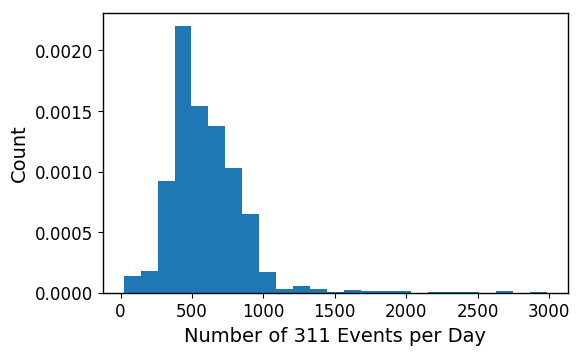

In [41]:
plt.hist(counts, bins=25, normed=True)
plt.xlabel('Number of 311 Events per Day')
plt.ylabel('Count')

In [42]:
from scipy.stats import poisson

(0, 3000)

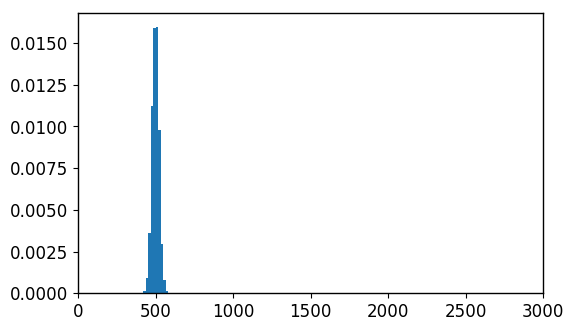

In [43]:
plt.hist(poisson.rvs(500, size=10000), normed=True)
plt.xlim(0, 3000)

It appears that the data does not fit a Poission distribution.